In [79]:
#packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [80]:
#load data
dashboard = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/dashboard.csv').sort_values(by='Unnamed: 0')
specs = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/specs.csv').sort_values(by='Unnamed: 0').iloc[: , 5:]
bbe = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/bbe.csv').sort_values(by='Unnamed: 0').iloc[: , 4:]
xstats = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/xstats.csv').sort_values(by='Unnamed: 0').iloc[: , 5:]
discipline = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/discipline.csv').sort_values(by='Unnamed: 0').iloc[: , 5:]
ooz = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/ooz.csv').sort_values(by='Unnamed: 0')
iz = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/iz.csv').sort_values(by='Unnamed: 0')

In [81]:
a = ooz.reindex(columns=['Unnamed: 0','Swing']).rename(columns={"Swing":'O-Swing'})
b = iz.reindex(columns=['Unnamed: 0','Swing','Contact']).rename(columns={"Swing":'Z-Swing','Contact':'Z-Contact'})
c = a.merge(b,on='Unnamed: 0',how='left') # merge swing contact metrics for graphing

In [82]:
z = pd.concat([dashboard,specs,bbe,xstats,discipline], axis=1) # .rename(columns={"Unnamed: 0": "Pitcher"})

In [83]:
bigboi = z.merge(c,on='Unnamed: 0',how='left').replace('%','', regex=True).replace(',','', regex=True).replace('°','', regex=True).drop(columns=['Unnamed: 1','Unnamed: 2','Unnamed: 3','Starts']) # merge, regex, drop

In [84]:
bigboi = bigboi.rename(columns={"Unnamed: 0":'Pitcher'})
bigboi[['Pitcher','PitchType']] = bigboi['Pitcher'].str.split('\'s',expand=True) # rename unamed column to pitcher and delimiter by astrophe

In [85]:
bigboi['Pitches'] = bigboi['Pitches'].astype(float) 
bigboi = bigboi.query('Pitches > 50')

In [86]:
bigboi['Measured ']
bigboi[['Hours','Minutes']] = bigboi['Measured '].str.split(':',expand=True) 
bigboi['Hours'] = bigboi['Hours'].astype(float)
bigboi['Minutes'] = bigboi['Minutes'].astype(float)

In [87]:
bigboi.to_csv('/Users/joerendon/Desktop/pitchseparationarticle/bigboi.csv') # store csv of chamberlain dashboard compiled

In [88]:
bigboi['Measured Spin Axis'] = abs(((bigboi['Hours'] *30.0 + bigboi['Minutes'] /2.0) - bigboi['Minutes']*6.0) % 360)

In [89]:
# list of every pitcher
pitcherlist = list(bigboi['Pitcher'].unique())
# empty df


# make df to use
new_df = pd.DataFrame({
                    'Pitcher':[], 
                    'Primary Pitches':[], 
                    'Secondary Pitches':[],
                    'Primary':[], 
                    'Secondary':[],
                    'Primary MPH':[],
                    'Secondary MPH':[],
                    'Primary H-Mov':[],
                    'Primary V-Mov':[],
                    'Secondary H-Mov':[], 
                    'Secondary V-Mov':[], 
                    'Primary Extension':[],
                    'Primary RelHei':[],
                    'Pimary RelSide':[],
                    'Primary Measured Axis':[],
                    'Secondary Measured Axis':[],
                    'RelHei Diff':[],
                    'RelSide Diff':[],
                    'Extension Diff':[],
                    'H-Mov Diff':[],
                    'V-Mov Diff':[], 
                    'MPH Diff':[], 
                    'RPM Diff':[],
                    'VAA Diff':[],
                    'HAA Diff':[],
                    'Measured Spin Axis Diff':[],
                    'Usage Rate':[],
                    'Chase Rate':[],
                    'Zone Whiff Rate':[],
                    'Whiff Rate':[],
                    'Called Strike Rate':[],
                    'wOBAcon':[]
                    } )

In [90]:
for i in range(len(pitcherlist)):

    pitcher_name = pitcherlist[i]
    # get pitcher
    ask = bigboi.query(f'Pitcher == "{pitcher_name}"').sort_values(by='Pitches',ascending=False)

    # get primary pitch
    primary = ask.head(1)
    primarytype = primary['PitchType'].values

    # loop through secondaries and get movement difference
    secondaries = ask.query(f'PitchType != {primarytype}')

    for secondaryitem in range(len(secondaries)):

        new_df.loc[len(new_df.index)] = [
                pitcher_name, # Pitcher
                primary['Pitches'].values[0],# number of primary pitches
                secondaries.iloc[secondaryitem]['Pitches'], # number of secondary pitches
                primary['PitchType'].values[0], # Primary
                secondaries.iloc[secondaryitem]['PitchType'], # Secondary
                primary['MPH'].values[0], # primary MPH
                [secondaries.iloc[secondaryitem]['MPH']][0], # secondary MPH
                primary[' H-Mov'].values[0],# primary H-Mov
                primary[' V-Mov'].values[0], # primary V-Mov
                [secondaries.iloc[secondaryitem][' H-Mov']][0],# secondary H-Mov
                [secondaries.iloc[secondaryitem][' V-Mov']][0], # secondary V-Mov
                primary['Ext (ft)'].values[0], # primary Extension
                primary['V-Rel Pt'].values[0], # primary Rel Height
                primary['H-Rel Pt'].values[0], # primary Rel Side
                primary['Measured Spin Axis'].values[0], #primary Measured Spin Axis
                [secondaries.iloc[secondaryitem]['Measured Spin Axis']][0], #secondary Measured Spin Axis
                math.dist([primary['V-Rel Pt']],[secondaries.iloc[secondaryitem]['V-Rel Pt']]), # V-Rel diff
                math.dist([primary['H-Rel Pt']],[secondaries.iloc[secondaryitem]['H-Rel Pt']]), # H-Rel diff
                math.dist([primary['Ext (ft)']],[secondaries.iloc[secondaryitem]['Ext (ft)']]), # Extension diff
                math.dist([primary[' H-Mov']],[secondaries.iloc[secondaryitem][' H-Mov']]), # H-Mov diff
                math.dist([primary[' V-Mov']],[secondaries.iloc[secondaryitem][' V-Mov']]),# V-Mov diff
                abs((primary['MPH'] - secondaries.iloc[secondaryitem]['MPH']).values[0]), # Velo diff
                abs((primary['RPM'].astype(float) - float(secondaries.iloc[secondaryitem]['RPM'])).values[0]), # Spin diff
                abs((primary['VAA'].astype(float) - float(secondaries.iloc[secondaryitem]['VAA'])).values[0]), # VertAprrAngle diff
                abs((primary['HAA'].astype(float) - float(secondaries.iloc[secondaryitem]['HAA'])).values[0]), # HorzAprrAngle diff
                math.dist([primary['Measured Spin Axis']],[secondaries.iloc[secondaryitem]['Measured Spin Axis']]), # Measured Spin Axis diff
                float(secondaries.iloc[secondaryitem]['Usage%']), # Usage Rate
                float(secondaries.iloc[secondaryitem]['O-Swing']), # Chase rate
                100 - float(secondaries.iloc[secondaryitem]['Z-Contact']), # Zone Whiff rate
                100 - float(secondaries.iloc[secondaryitem]['Contact']), # Whiff rate
                float(secondaries.iloc[secondaryitem]['CallStr']), #Called Str rate
                float(secondaries.iloc[secondaryitem]['wOBAcon']) # wOBAcon
            ]
               
    print(pitcherlist[i]) # make sure stuff works

Abbott Cory
Abreu Albert
Abreu Bryan
Acevedo Domingo
Adam Jason
Adon Joan
Akin Keegan
Alcantara Sandy
Alexander Jason
Alexander Tyler
Allard Kolby
Allen Logan
Almonte Yency
Alvarado José
Anderson Ian
Anderson Tyler
Appel Mark
Arano Víctor
Archer Chris
Armstrong Shawn
Ashby Aaron
Ashcraft Graham
Baker Bryan
Banda Anthony
Banks Tanner
Bard Daniel
Bard Luke
Barlow Joe
Barlow Scott
Barnes Jacob
Barnes Matt
Barraclough Kyle
Barría Jaime
Bass Anthony
Bassitt Chris
Baumann Mike
Bautista Félix
Baz Shane
Bañuelos Manny
Beasley Jeremy
Bednar David
Beede Tyler
Beeks Jalen
Bellatti Andrew
Bello Brayan
Bender Anthony
Berríos José
Bickford Phil
Bieber Shane
Bielak Brandon
Bird Jake
Blach Ty
Blackburn Paul
Blanco Ronel
Bleier Richard
Bolaños Ronald
Borucki Ryan
Boxberger Brad
Bradish Kyle
Bradley Archie
Brash Matt
Brasier Ryan
Brebbia John
Brentz Jake
Brieske Beau
Brigham Jeff
Brogdon Connor
Brubaker JT
Bruihl Justin
Bubic Kris
Buehler Walker
Bumgarner Madison
Bummer Aaron
Bundy Dylan
Burke Brock
Bur

In [91]:
new_df.to_csv('/Users/joerendon/Desktop/pitchseparationarticle/diffboi.csv')

In [92]:
unique_prim = list(new_df['Primary'].unique())
unique_second = list(new_df['Secondary'].unique())

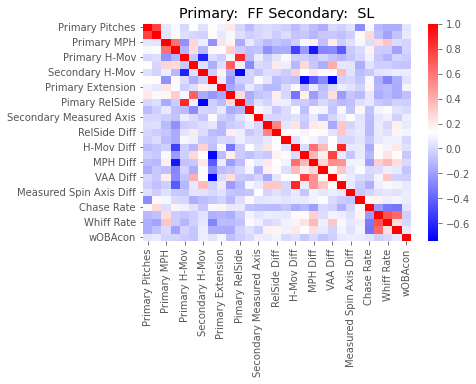

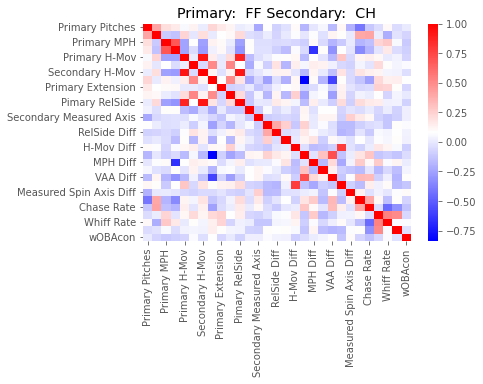

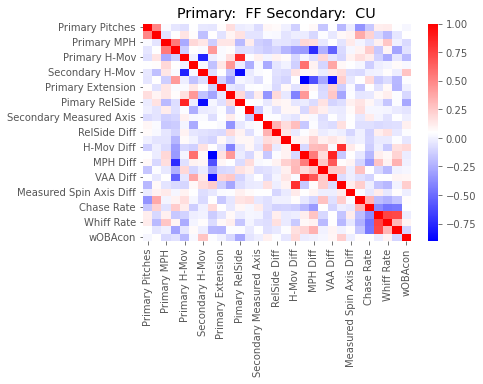

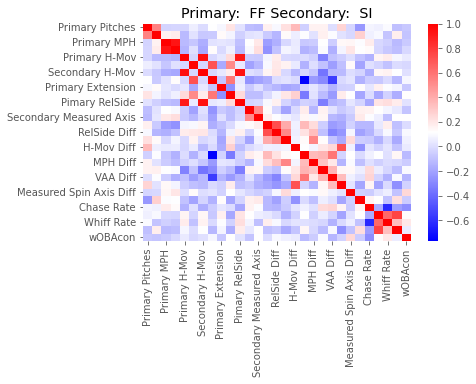

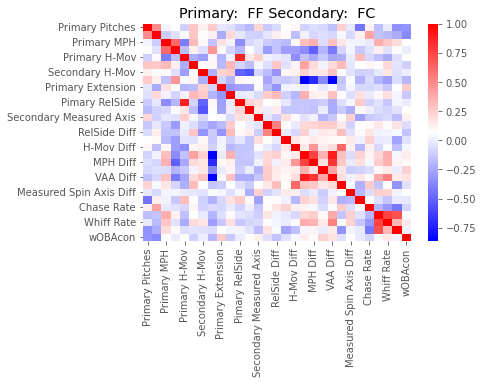

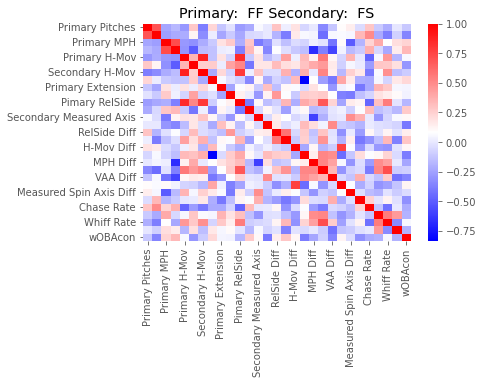

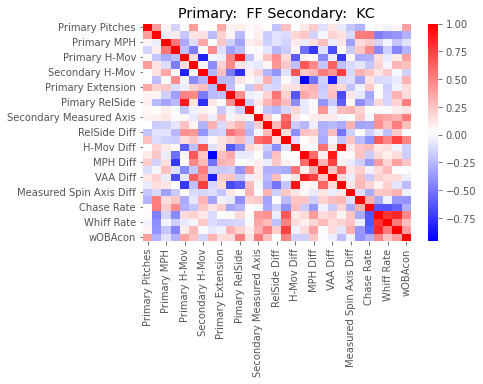

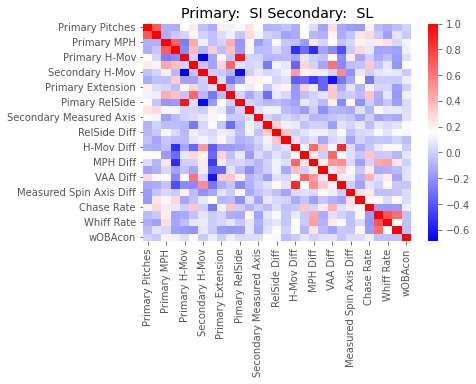

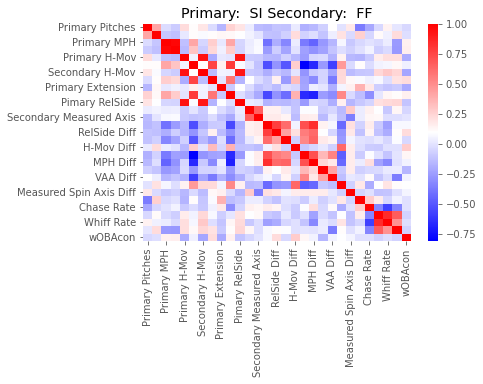

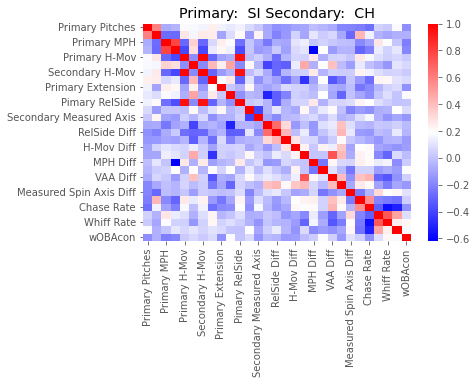

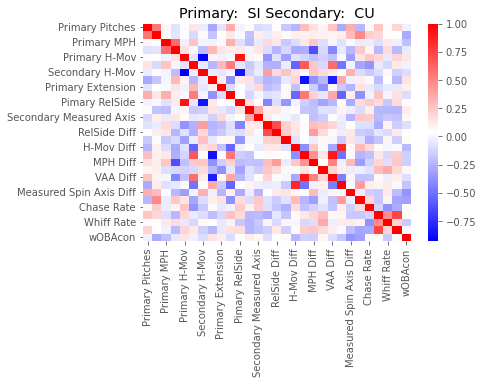

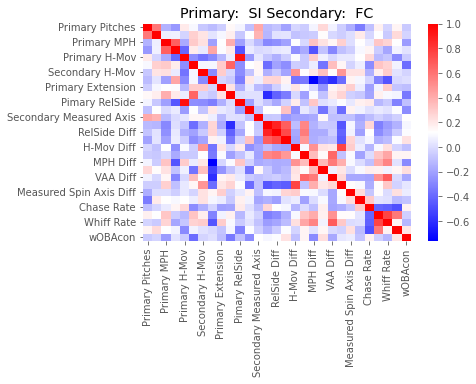

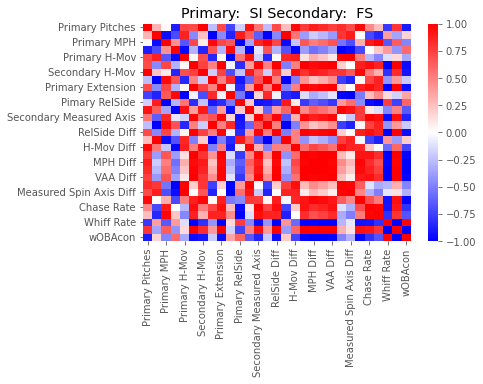

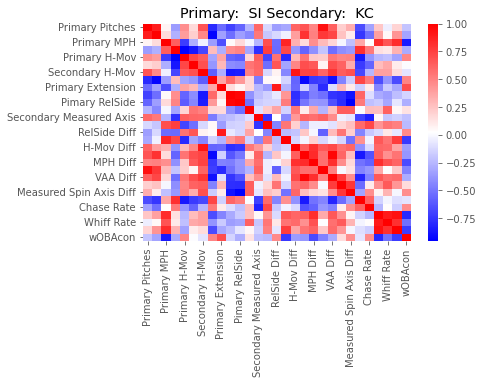

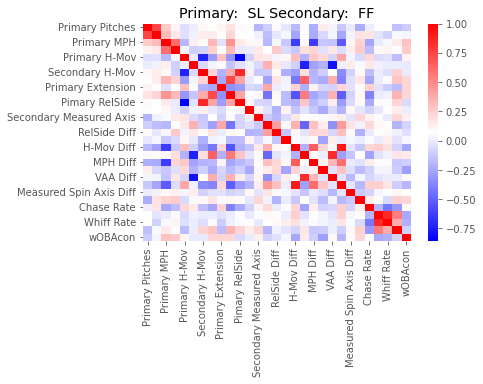

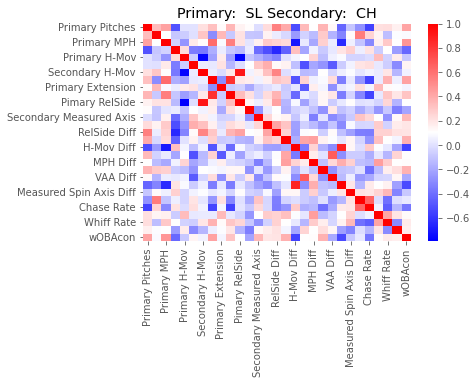

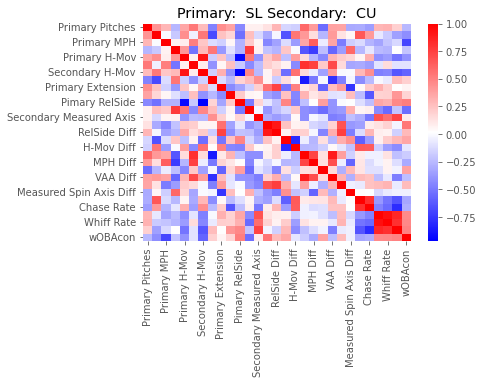

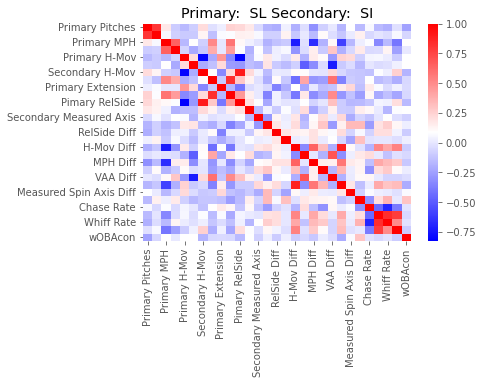

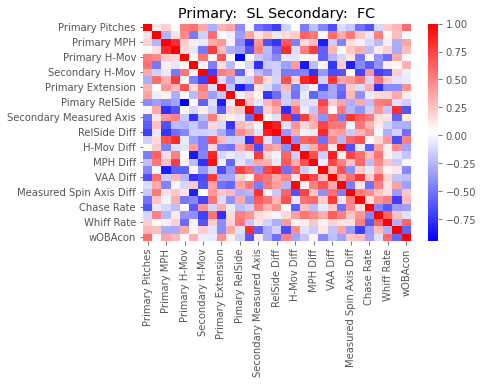

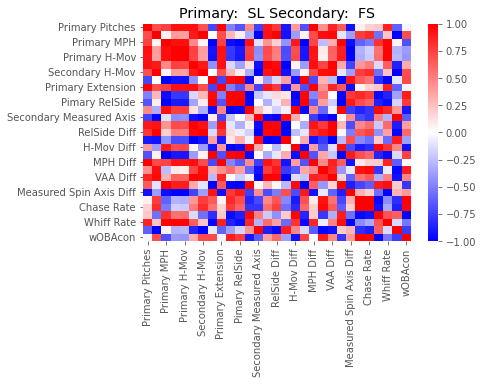

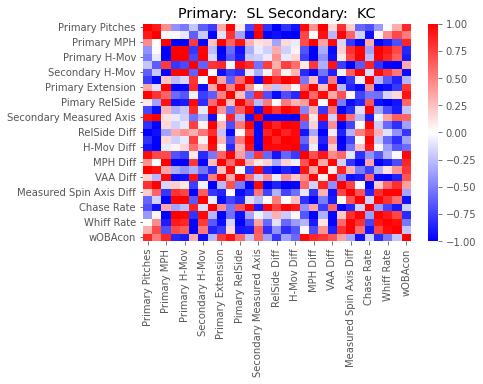

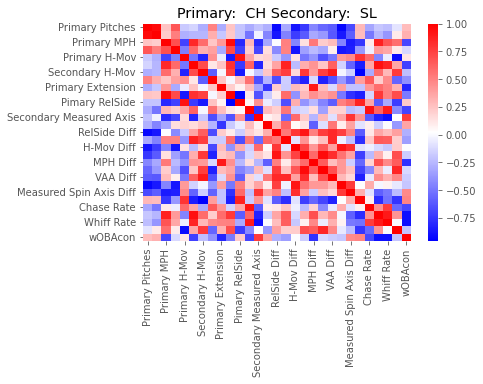

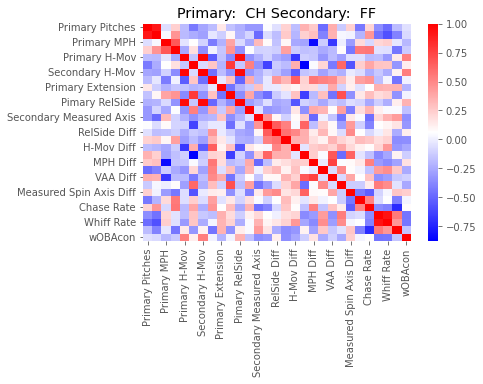

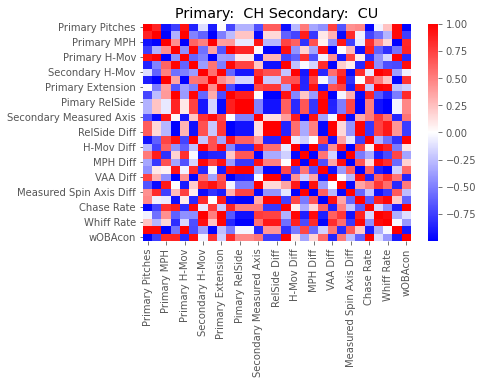

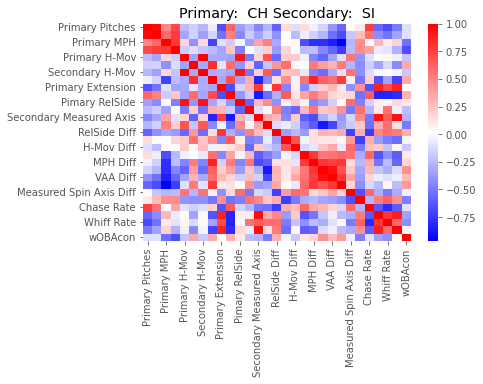

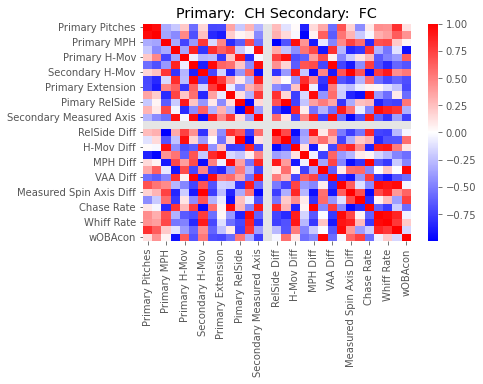

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


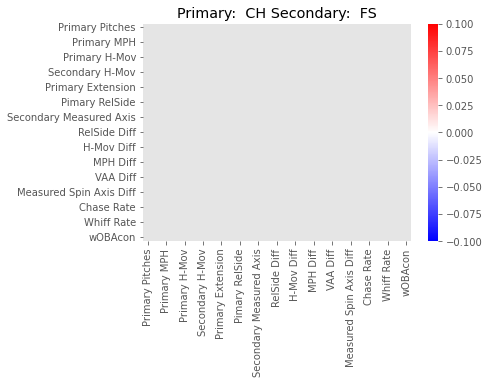

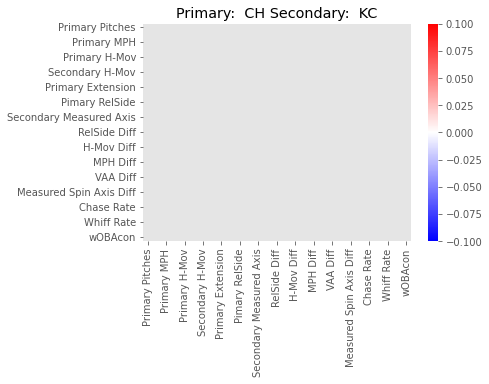

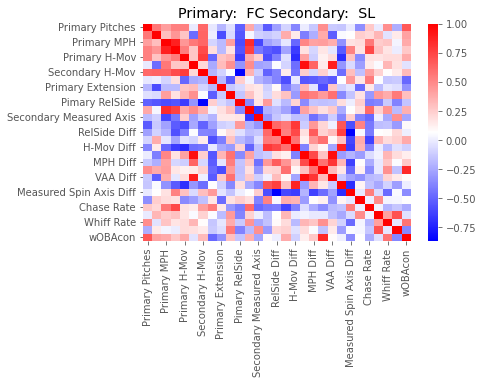

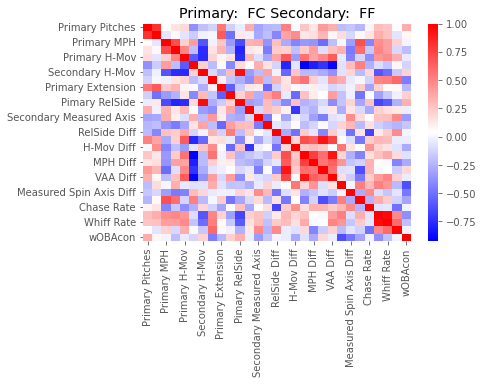

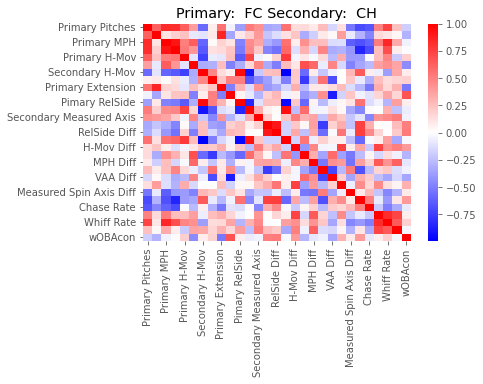

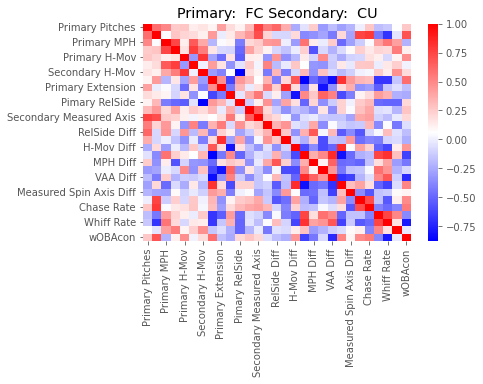

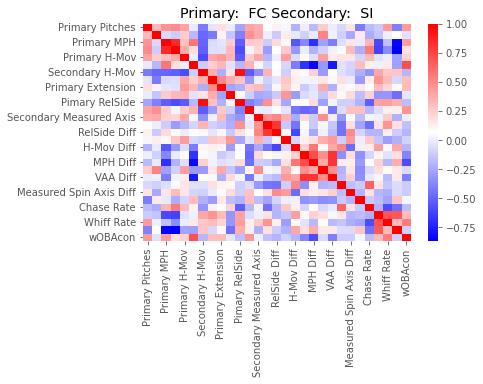

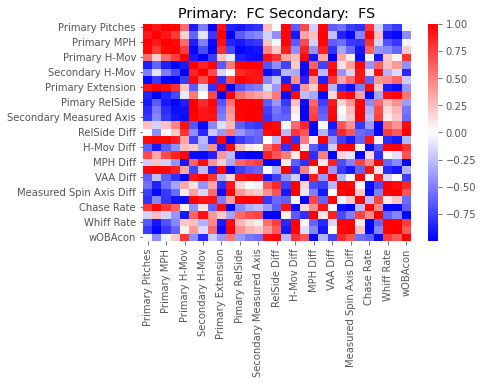

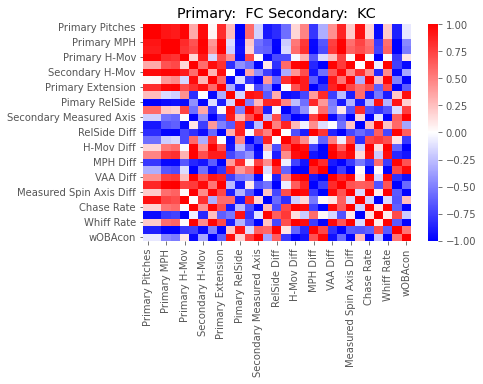

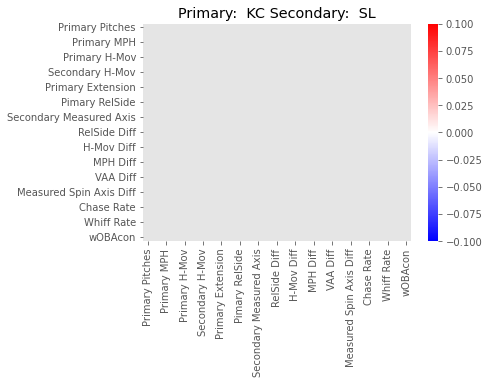

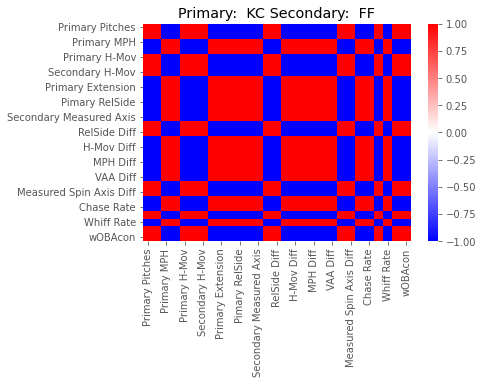

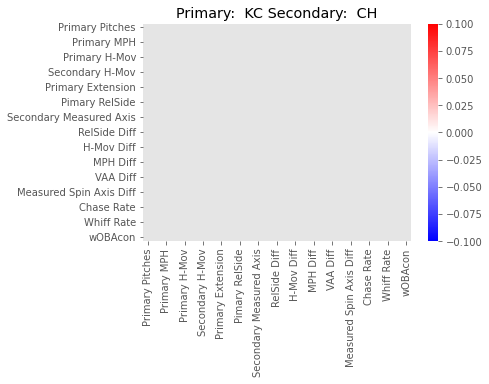

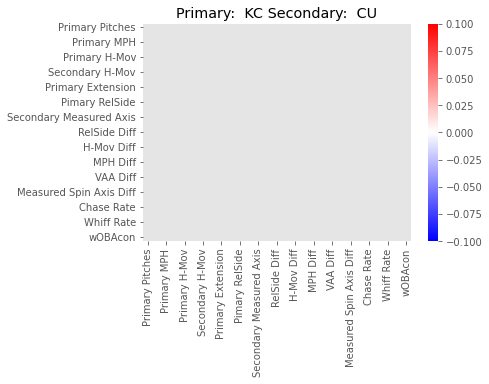

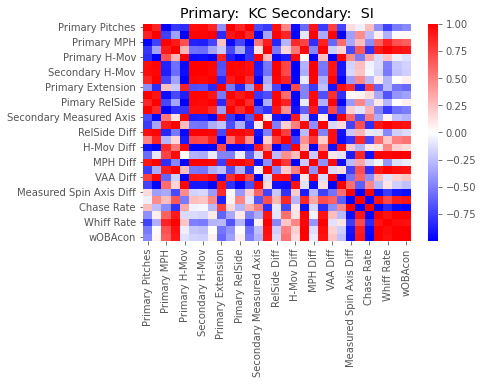

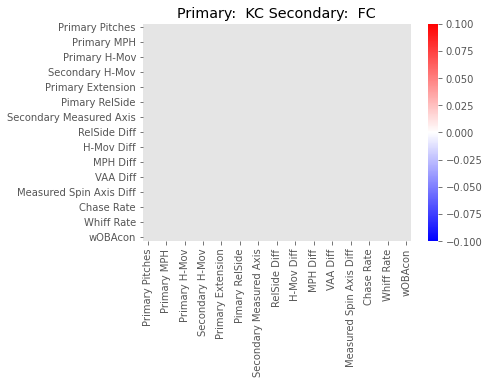

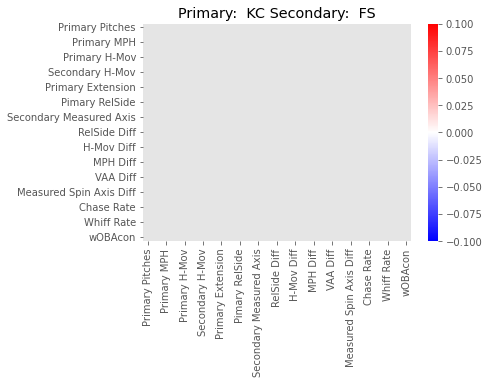

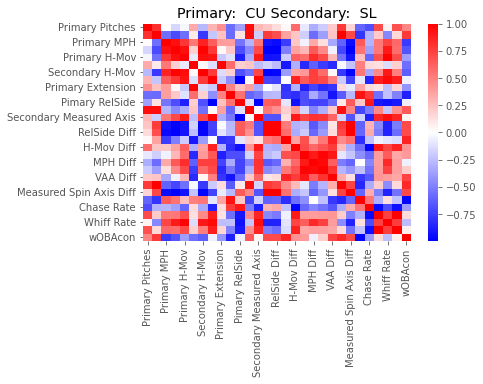

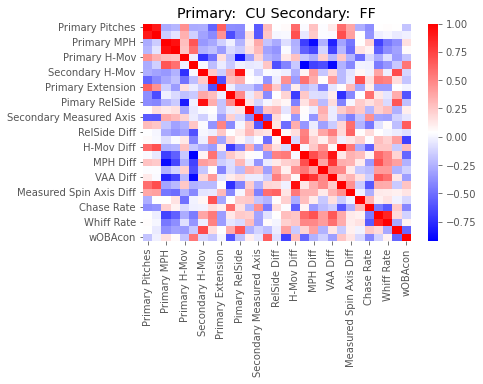

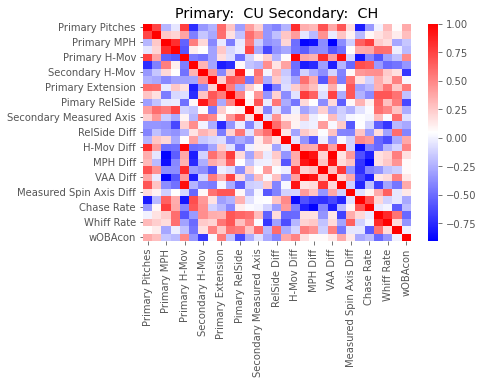

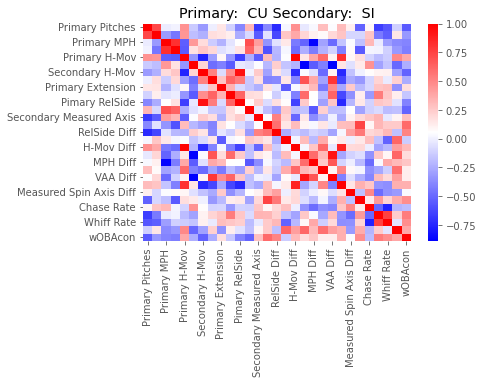

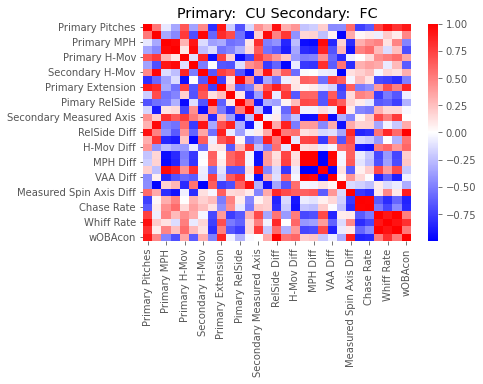

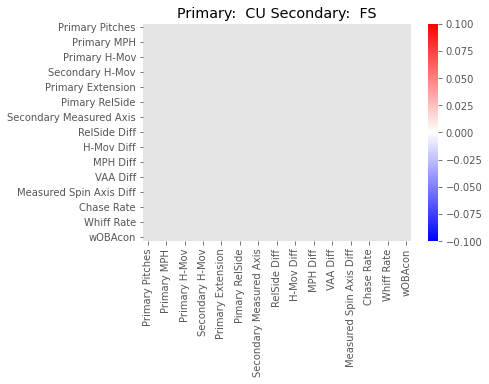

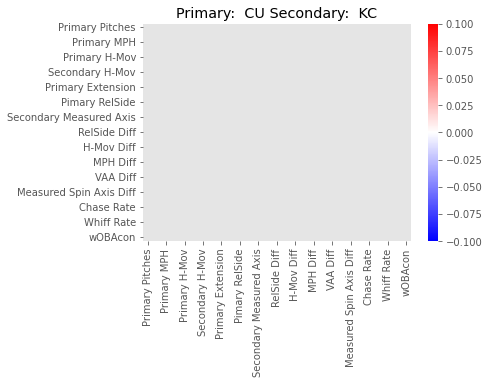

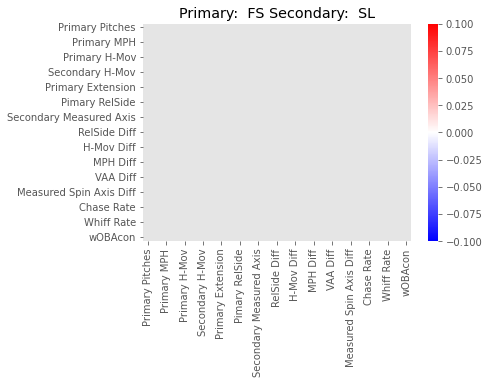

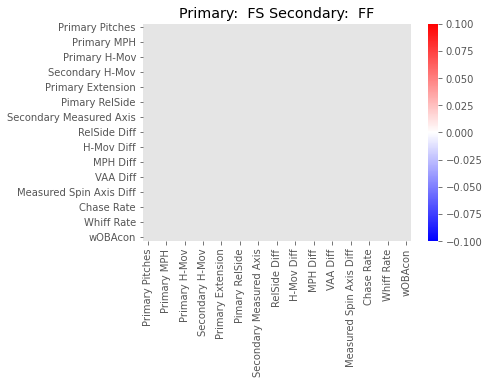

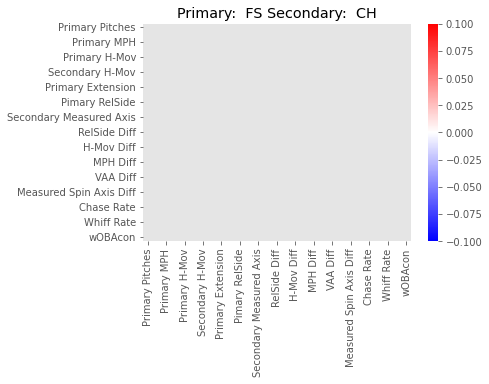

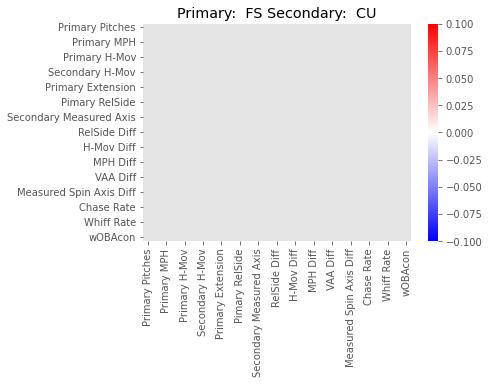

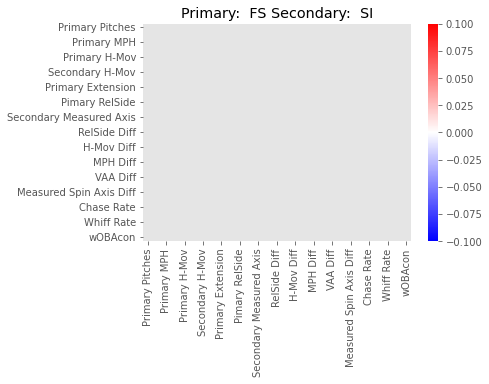

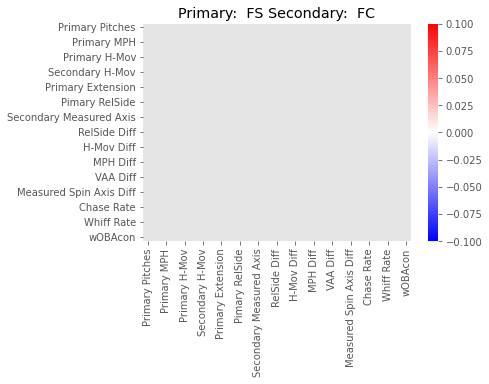

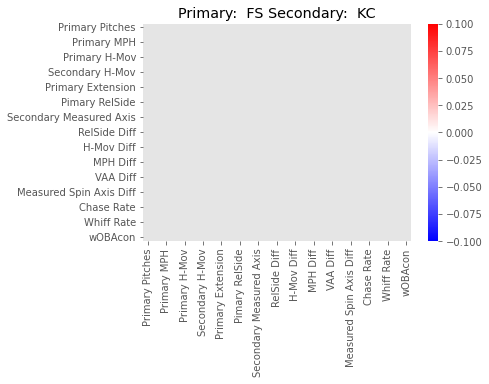

In [93]:
for prim in range(len(unique_prim)): # for every primary and...
    for prop in range(len(unique_second)): #....every secondary combo make a correlation heatmap and title it
        first = unique_prim[prim]
        second = unique_second[prop]
        degromers = new_df.query(f'Primary == "{first}" and Secondary == "{second}"')

        #corrmap
        if first != second:
            ax = plt.axes()
            dataplot = sns.heatmap(degromers.corr(), cmap="bwr",ax=ax)
            ax.set_title(f'Primary: {first} Secondary: {second}')
            plt.savefig(f'Corr Plot Primary:{first} Secondary:{second}.png')
        plt.show()

In [94]:
# outlier removing
statsli = ['Chase Rate','Called Strike Rate','Zone Whiff Rate','wOBAcon']
for stat in range(len(statsli)):
    print(statsli[stat])
    stater = statsli[stat]
    print('B',len(new_df[stater]))
    q1 = new_df[stater].quantile(.25)
    q3 = new_df[stater].quantile(.75)
    iqr = q3 - q1
    lim_lo = q1 - 1.5 * iqr
    lim_hi = q3 + 1.5 * iqr
    out_lo = (new_df[stater] < lim_lo)
    out_hi = (new_df[stater] > lim_hi)
    new_df[stater] = new_df[stater][~(out_lo | out_hi)]
    print('A',len(new_df[stater]))

Chase Rate
B 1315
A 1315
Called Strike Rate
B 1315
A 1315
Zone Whiff Rate
B 1315
A 1315
wOBAcon
B 1315
A 1315


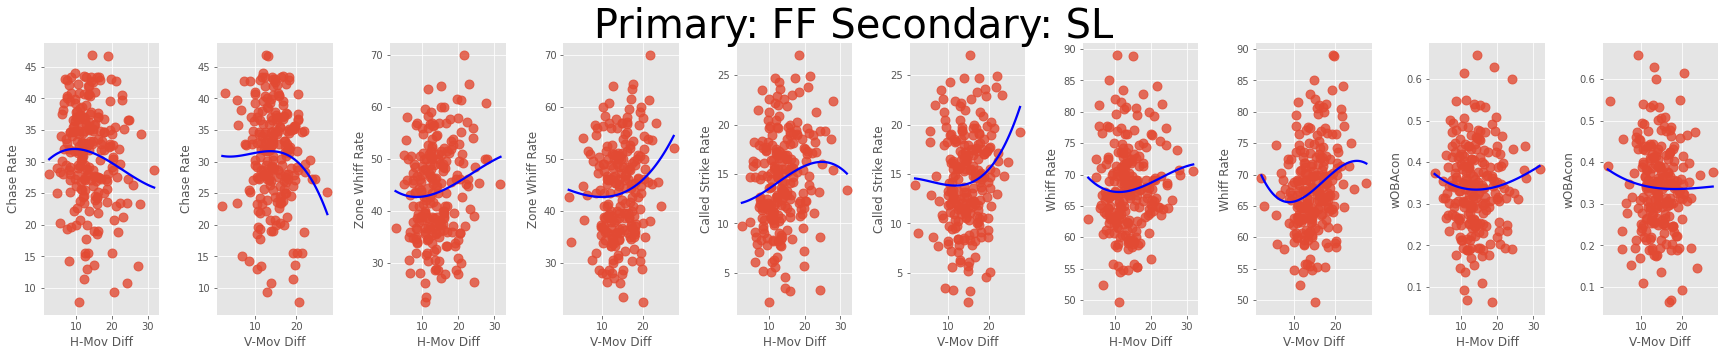

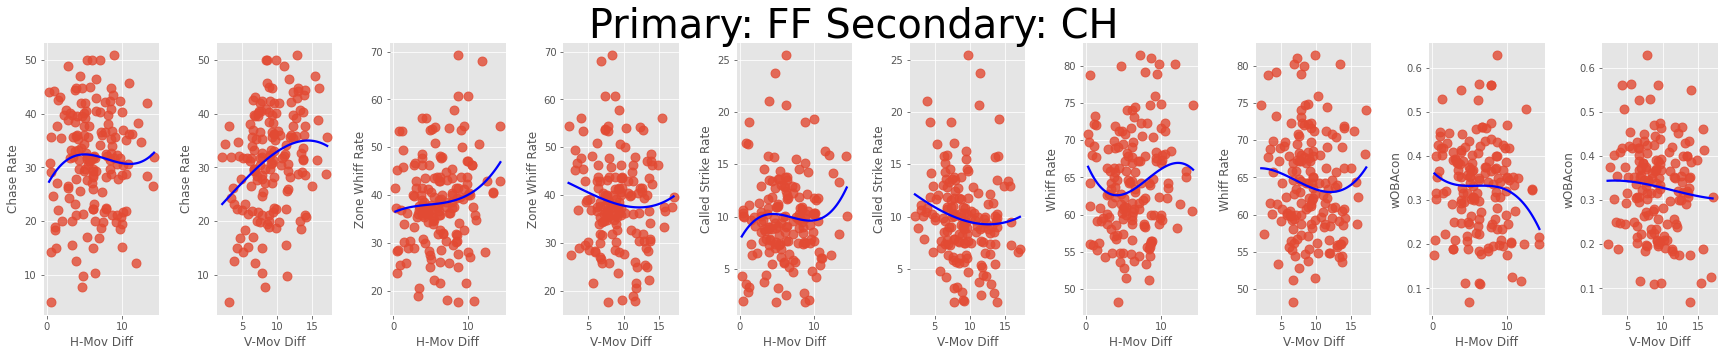

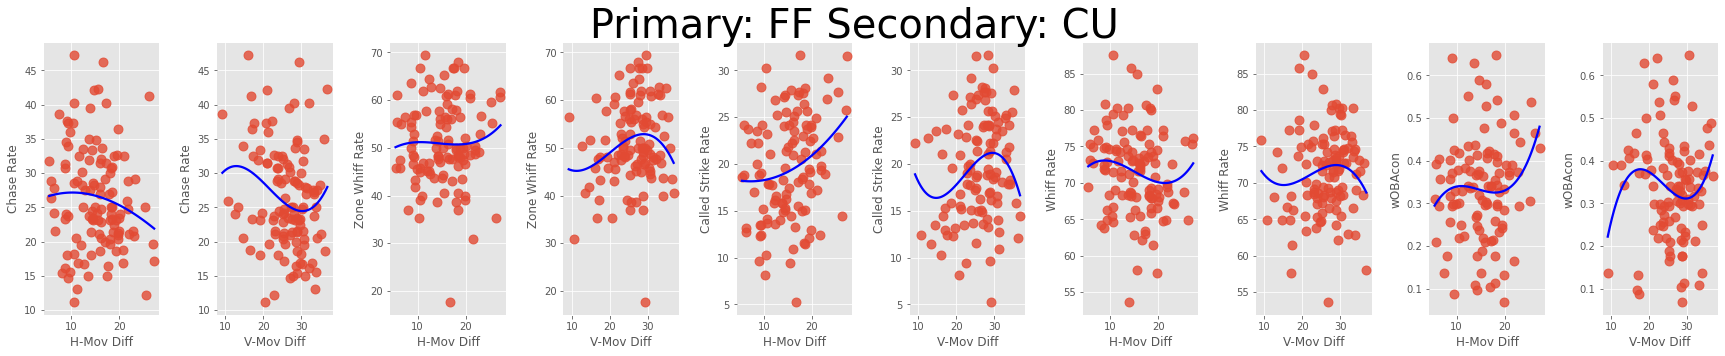

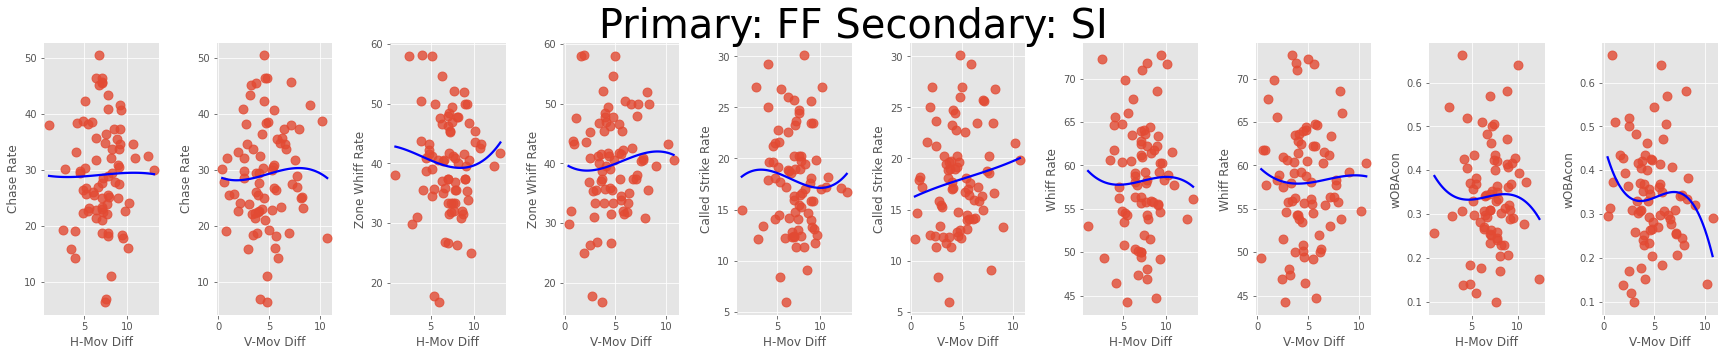

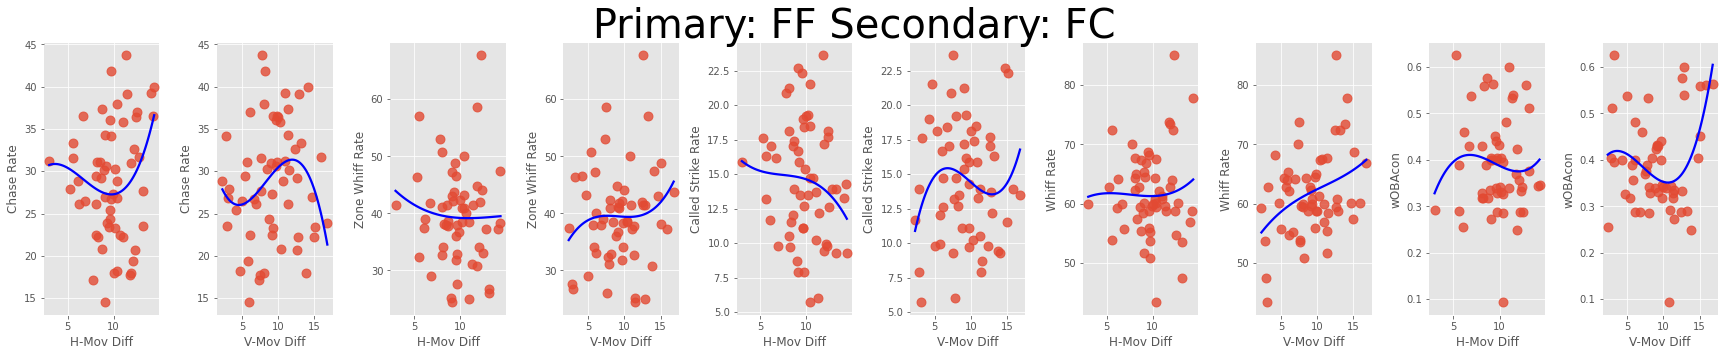

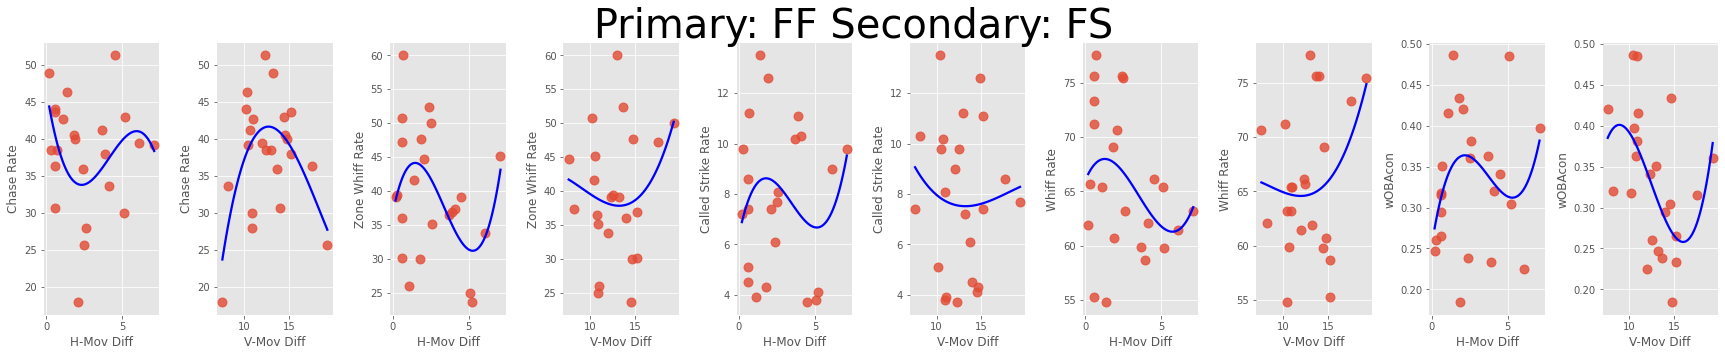

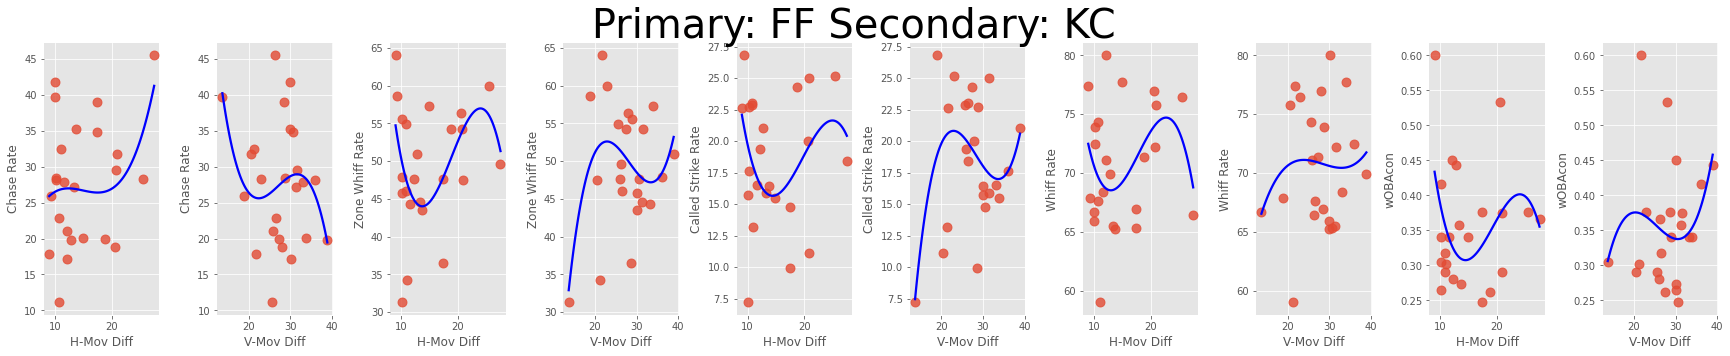

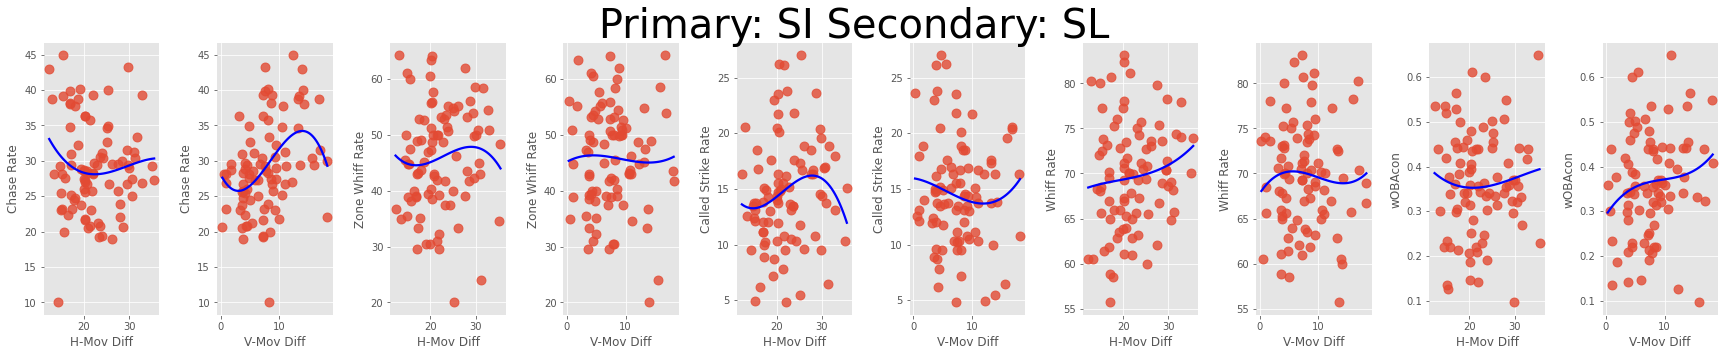

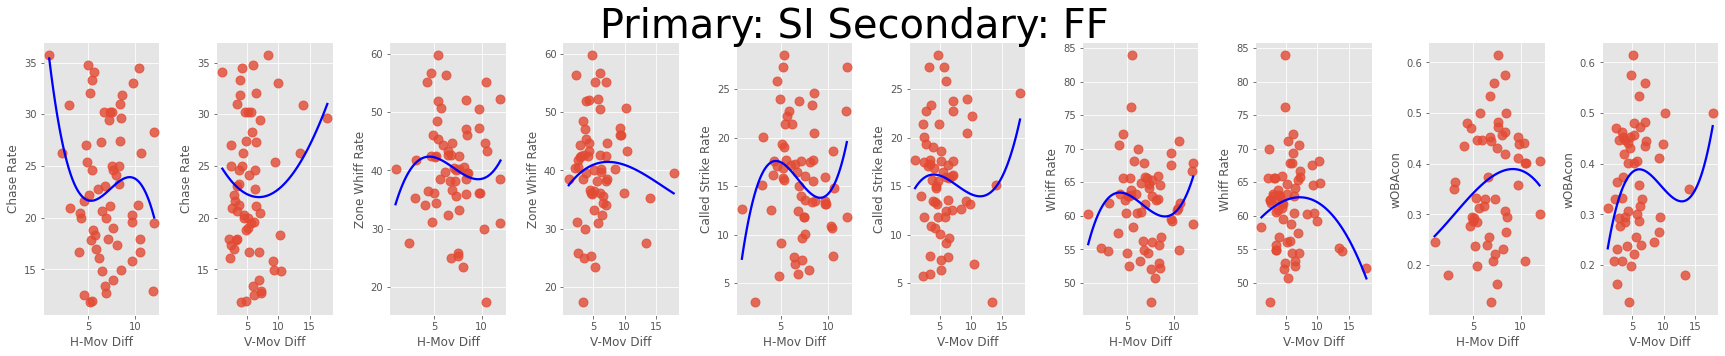

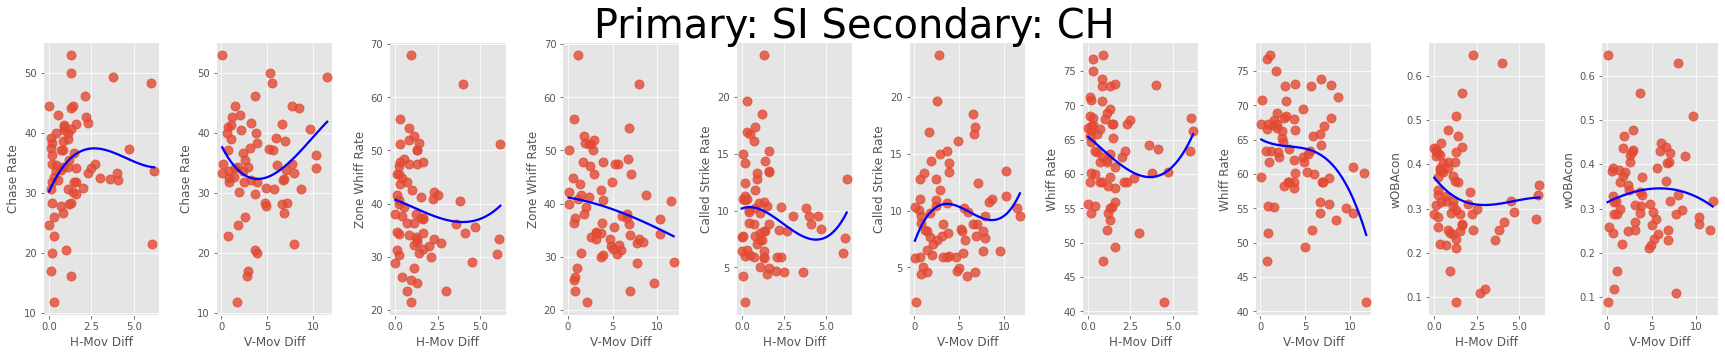

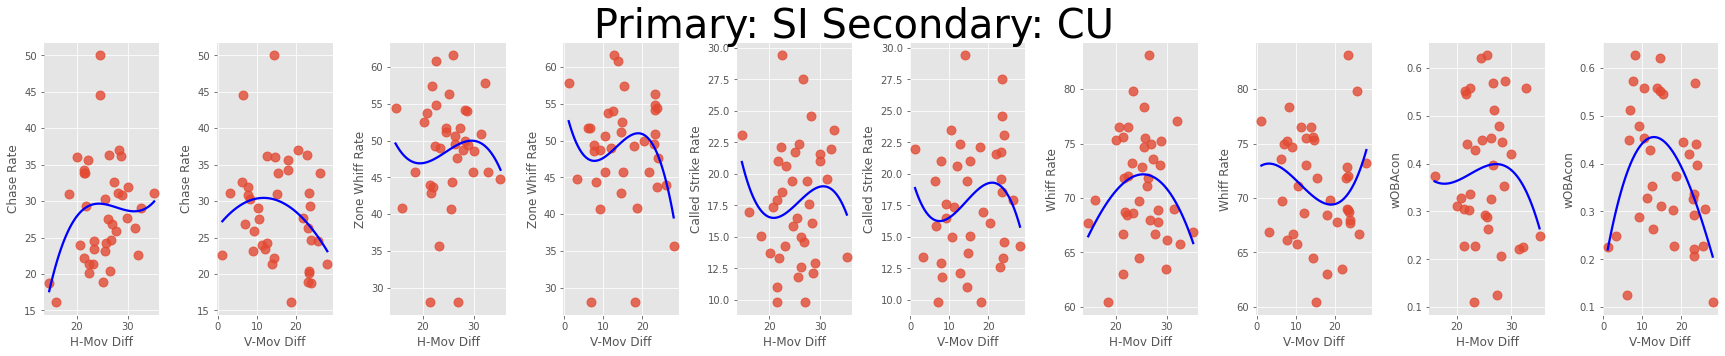

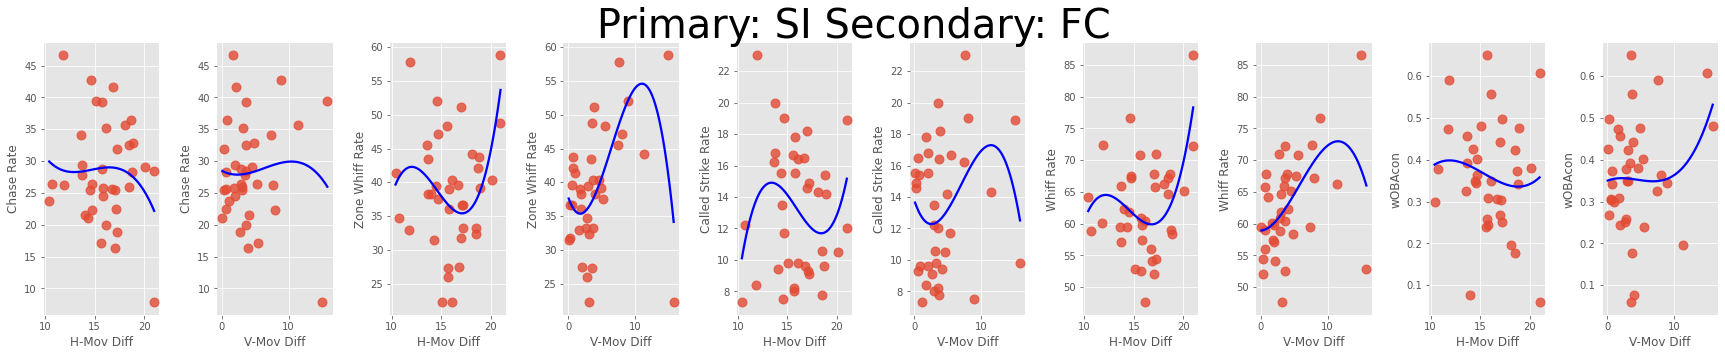

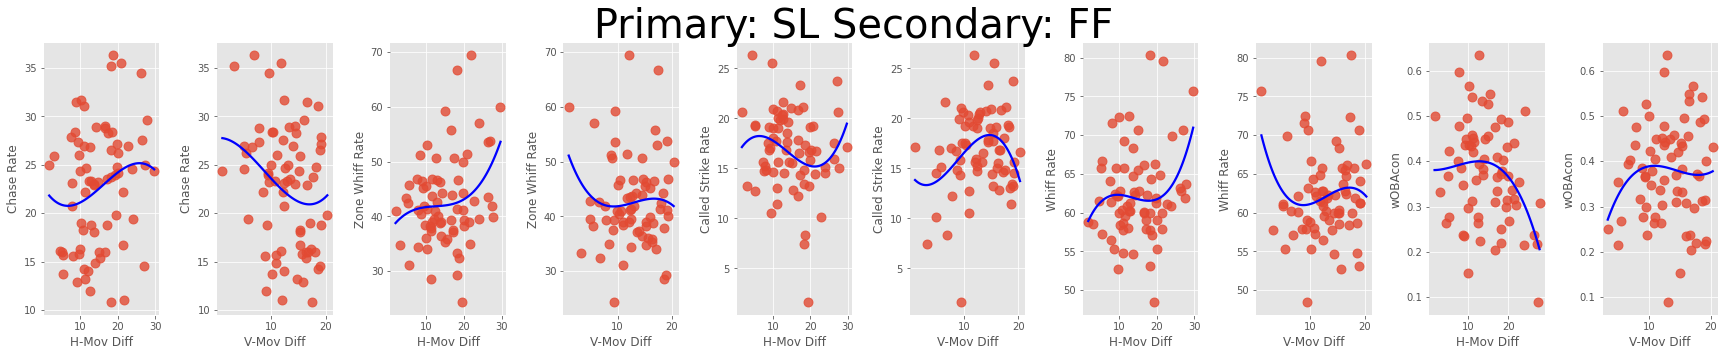

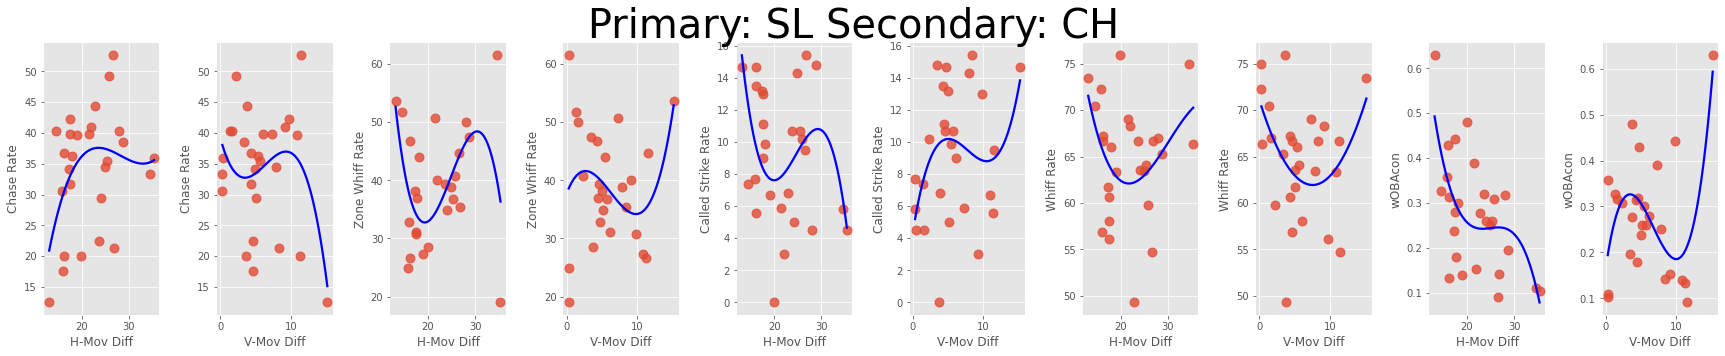

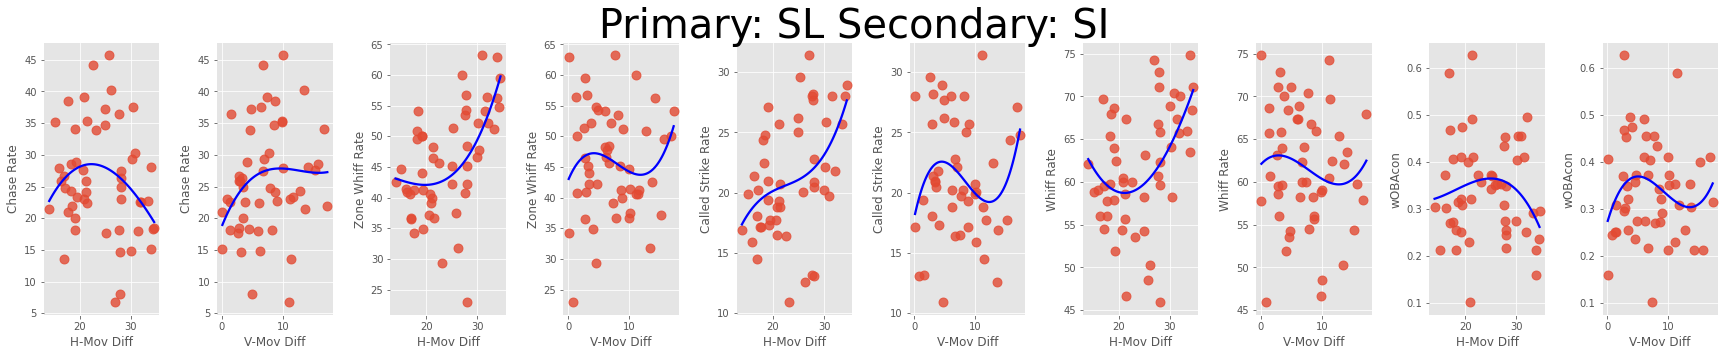

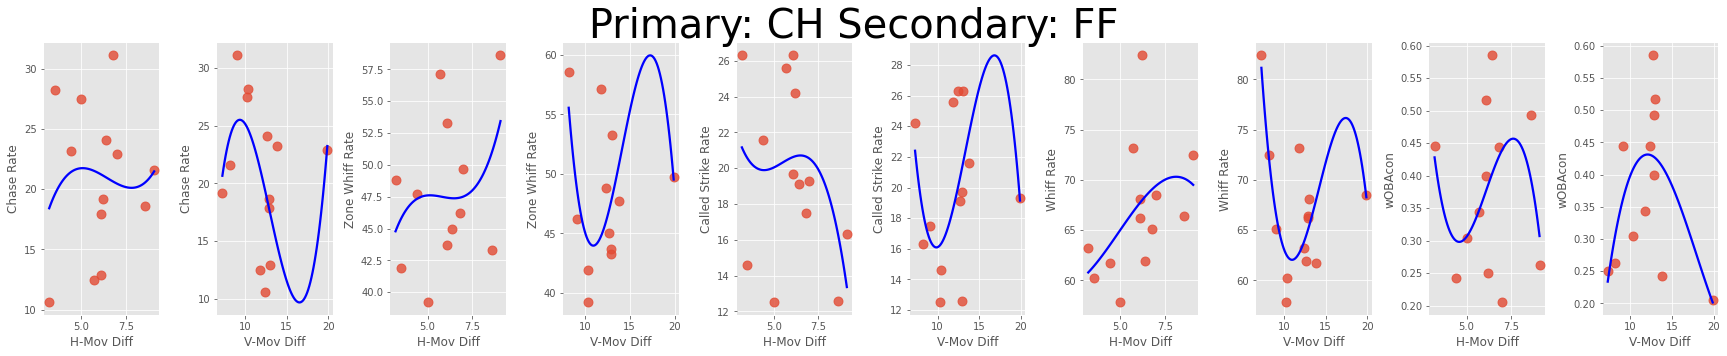

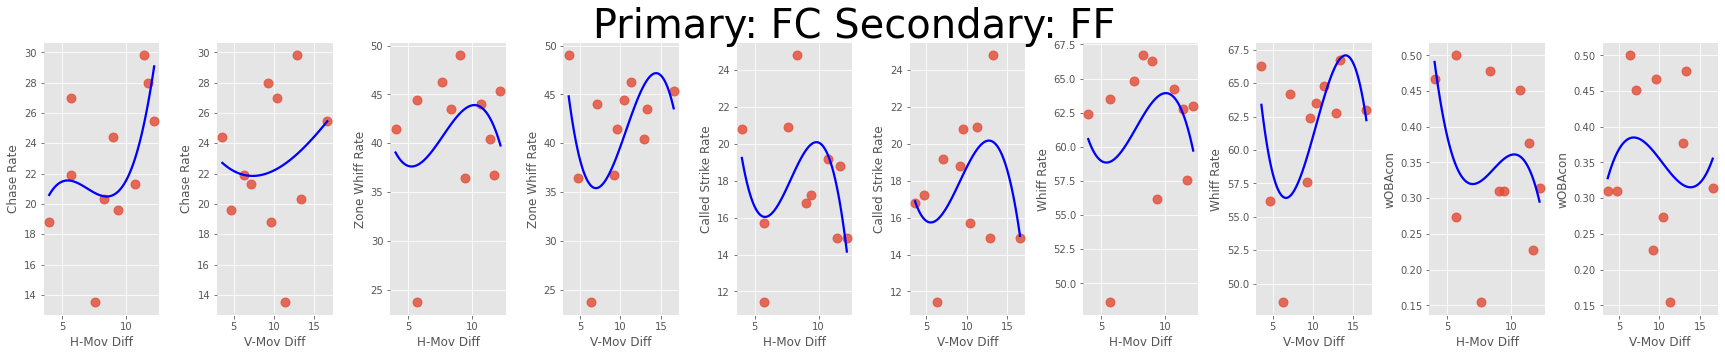

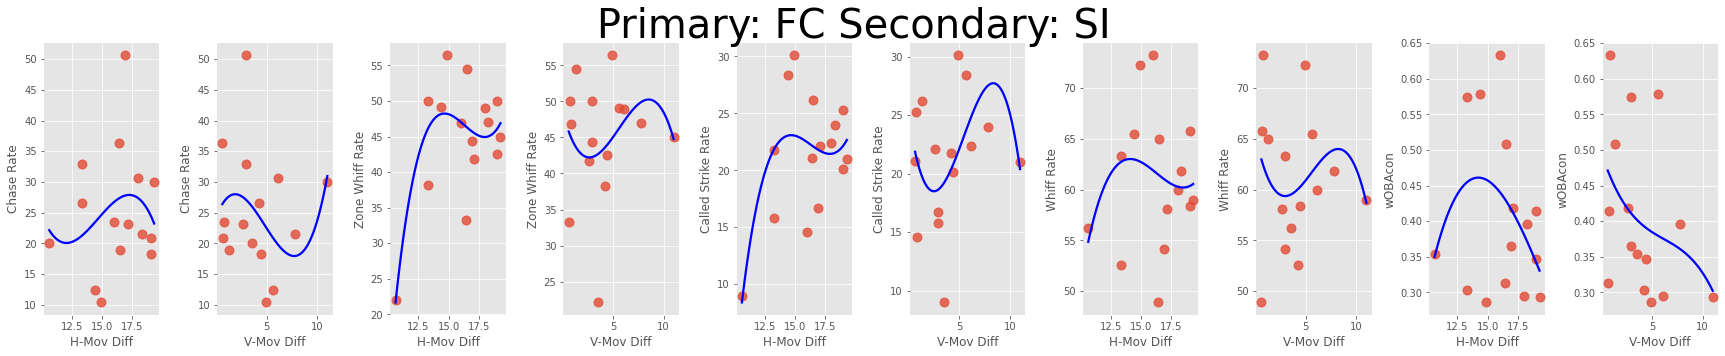

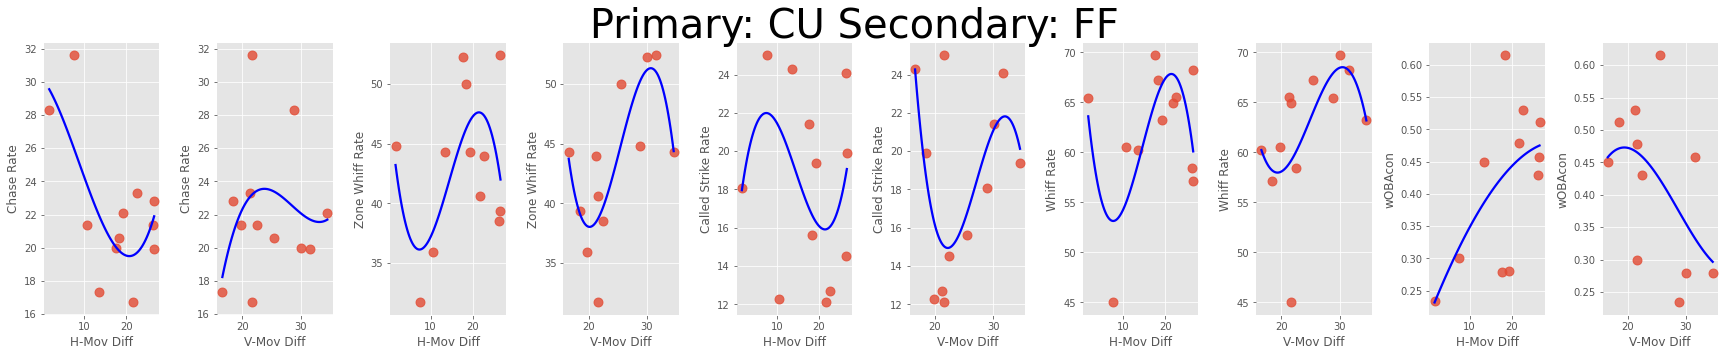

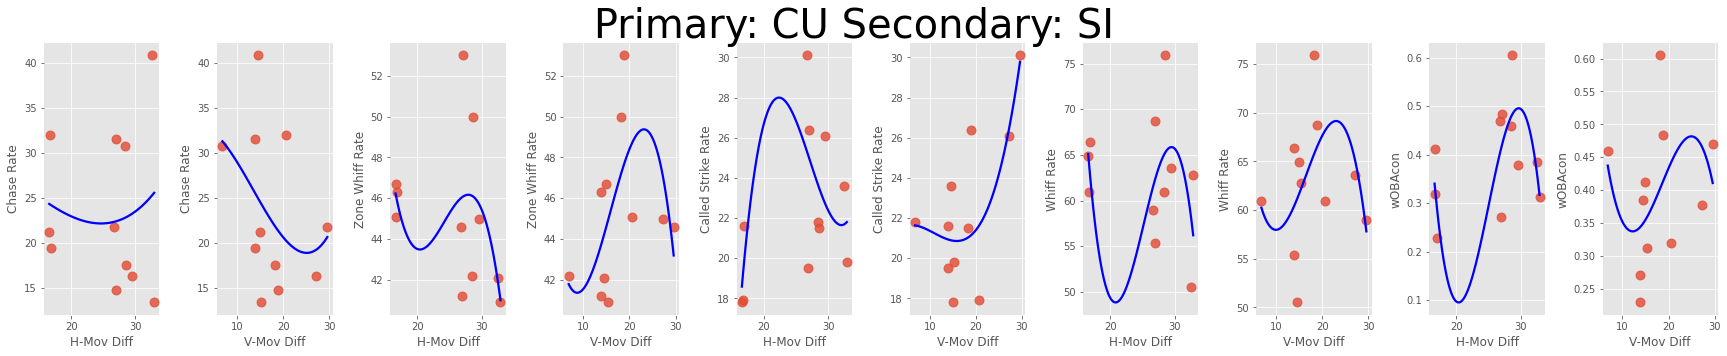

In [95]:
plt.style.use('ggplot')
for prim in range(len(unique_prim)):
    for prop in range(len(unique_second)):
        first = unique_prim[prim]
        second = unique_second[prop]
        degromers = new_df.query(f'Primary == "{first}" and Secondary == "{second}"')

        if len(degromers) > 10 :

                fig, axs = plt.subplots(ncols=10, figsize=(30,5))
                plt.subplots_adjust(wspace=.5)

                #chase rate plots
                
                sns.regplot(x="H-Mov Diff", y="Chase Rate", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[0], line_kws={"color": "blue"})
                sns.regplot(x="V-Mov Diff", y="Chase Rate", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[1], line_kws={"color": "blue"})
                
                # zone whiff plots
                sns.regplot(x="H-Mov Diff", y="Zone Whiff Rate", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[2], line_kws={"color": "blue"})
                sns.regplot(x="V-Mov Diff", y="Zone Whiff Rate", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[3], line_kws={"color": "blue"})

                # called strike plots
                sns.regplot(x="H-Mov Diff", y="Called Strike Rate", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[4], line_kws={"color": "blue"})
                sns.regplot(x="V-Mov Diff", y="Called Strike Rate", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[5], line_kws={"color": "blue"})

                #whiff plots
                sns.regplot(x="H-Mov Diff", y="Whiff Rate", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[6], line_kws={"color": "blue"})
                sns.regplot(x="V-Mov Diff", y="Whiff Rate", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[7], line_kws={"color": "blue"})
                
                #wOBAcon plots
                sns.regplot(x="H-Mov Diff", y="wOBAcon", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[8], line_kws={"color": "blue"})
                sns.regplot(x="V-Mov Diff", y="wOBAcon", data=degromers,scatter_kws={"s": 80},order=3,ci=None, ax=axs[9], line_kws={"color": "blue"})

                #no backbone lul

                sns.despine(left=True)

                # save and title
                fig.suptitle(f'Primary:{first} Secondary:{second}',size=40)
                fig.savefig(f'Primary:{first} Secondary:{second}.png')
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=5, hspace=None)

In [98]:
#testing stuff works
df1 = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/diffboi.csv')
df1.query('Pitcher == "Darvish Yu"')

Unnamed: 0     Pitcher  Primary Pitches  Secondary Pitches Primary  \
256         256  Darvish Yu            730.0              497.0      FC   
257         257  Darvish Yu            730.0              400.0      FC   
258         258  Darvish Yu            730.0              200.0      FC   
259         259  Darvish Yu            730.0              157.0      FC   
260         260  Darvish Yu            730.0               88.0      FC   

    Secondary  Primary MPH  Secondary MPH  Primary H-Mov  Primary V-Mov  ...  \
256        FF         86.6           95.2            5.1            0.5  ...   
257        SL         86.6           82.6            5.1            0.5  ...   
258        SI         86.6           94.8            5.1            0.5  ...   
259        FS         86.6           89.5            5.1            0.5  ...   
260        CU         86.6           72.7            5.1            0.5  ...   

     RPM Diff  VAA Diff  HAA Diff  Measured Spin Axis Diff  Usage Rate  \
256     348.0       2.6       1.4                     53.0        23.0   
257      23.0       0.9       1.1                    228.5        18.0   
258     478.0       2.1       2.1                    274.0         9.7   
259    1419.0       0.3       2.0                     58.5         5.7   
260     122.0       3.3       0.3                     72.0         4.4   

     Chase Rate  Zone Whiff Rate  Whiff Rate  Called Strike Rate  wOBAcon  
256        25.5             45.3        63.0                14.9    0.314  
257        36.8             43.2        61.0                15.0    0.260  
258        30.0             45.0        59.0                21.0    0.293  
259        40.9             29.7        59.2                 3.8    0.277  
260        15.6             53.5        73.9                20.5    0.220  

[5 rows x 33 columns]

In [99]:
new_df.columns

Index(['Pitcher', 'Primary Pitches', 'Secondary Pitches', 'Primary',
       'Secondary', 'Primary MPH', 'Secondary MPH', 'Primary H-Mov',
       'Primary V-Mov', 'Secondary H-Mov', 'Secondary V-Mov',
       'Primary Extension', 'Primary RelHei', 'Pimary RelSide',
       'Primary Measured Axis', 'Secondary Measured Axis', 'RelHei Diff',
       'RelSide Diff', 'Extension Diff', 'H-Mov Diff', 'V-Mov Diff',
       'MPH Diff', 'RPM Diff', 'VAA Diff', 'HAA Diff',
       'Measured Spin Axis Diff', 'Usage Rate', 'Chase Rate',
       'Zone Whiff Rate', 'Whiff Rate', 'Called Strike Rate', 'wOBAcon'],
      dtype='object')

In [103]:
new_df.columns

Index(['Pitcher', 'Primary Pitches', 'Secondary Pitches', 'Primary',
       'Secondary', 'Primary MPH', 'Secondary MPH', 'Primary H-Mov',
       'Primary V-Mov', 'Secondary H-Mov', 'Secondary V-Mov',
       'Primary Extension', 'Primary RelHei', 'Pimary RelSide',
       'Primary Measured Axis', 'Secondary Measured Axis', 'RelHei Diff',
       'RelSide Diff', 'Extension Diff', 'H-Mov Diff', 'V-Mov Diff',
       'MPH Diff', 'RPM Diff', 'VAA Diff', 'HAA Diff',
       'Measured Spin Axis Diff', 'Usage Rate', 'Chase Rate',
       'Zone Whiff Rate', 'Whiff Rate', 'Called Strike Rate', 'wOBAcon'],
      dtype='object')